In [ ]:
!kaggle datasets download -d alphiree/cardiovascular-diseases-risk-prediction-dataset
!unzip "/content/cardiovascular-diseases-risk-prediction-dataset.zip" -d "/content"

Dataset URL: https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset
License(s): CC0-1.0
  0% 0.00/4.87M [00:00<?, ?B/s]
100% 4.87M/4.87M [00:00<00:00, 79.3MB/s]
Archive:  /content/cardiovascular-diseases-risk-prediction-dataset.zip
  inflating: /content/CVD_cleaned.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE
from sklearn.feature_selection import mutual_info_classif

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv("/content/CVD_cleaned.csv")

In [ ]:
copy_df = df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [ ]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0




*   We are now moving on to our predictive machine learning model, using `Heart_Disease` as our focus.
*   For this model, we won't require users to enter details about conditions such as `Skin_Cancer`, `Other_Cancer`, `Depression`, `Diabetes`, and `Arthritis`. Therefore, I will drop these columns from the dataset for the model-building process.




In [ ]:
model_df = df.drop(columns = ["Skin_Cancer", "Other_Cancer", "Depression", "Diabetes", "Arthritis"])

In [ ]:
model_df

,General_Health,Checkup,Exercise,Heart_Disease,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [ ]:
df["Alcohol_Consumption"].value_counts().index

Index([ 0.0,  1.0,  4.0,  2.0,  8.0, 30.0,  3.0,  5.0, 20.0, 12.0, 10.0, 15.0,
       28.0, 16.0,  6.0, 25.0,  7.0, 24.0, 14.0, 29.0,  9.0, 27.0, 21.0, 18.0,
       22.0, 26.0, 17.0, 13.0, 23.0, 11.0, 19.0],
      dtype='float64', name='Alcohol_Consumption')



*   As we discussed, the alcohol consumption column was ambiguous because we didn’t have the units for these values. Let’s try categorizing this data.


In [ ]:
def categorize_alcohol(consumption):
    if consumption <= 5:
        return 'Low'
    elif 5 < consumption <= 15:
        return 'Medium'
    elif 15 < consumption <= 25:
        return 'High'
    else:
        return 'Very High'

In [ ]:
model_df["Alcohol_Consumption_Category"] = model_df["Alcohol_Consumption"].apply(categorize_alcohol)

In [ ]:
model_df.drop(columns = ["Alcohol_Consumption"], inplace = True)

In [ ]:
model_df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Alcohol_Consumption_Category
0,Poor,Within the past 2 years,No,No,Female,70-74,150.0,32.66,14.54,Yes,30.0,16.0,12.0,Low
1,Very Good,Within the past year,No,Yes,Female,70-74,165.0,77.11,28.29,No,30.0,0.0,4.0,Low
2,Very Good,Within the past year,Yes,No,Female,60-64,163.0,88.45,33.47,No,12.0,3.0,16.0,Low
3,Poor,Within the past year,Yes,Yes,Male,75-79,180.0,93.44,28.73,No,30.0,30.0,8.0,Low
4,Good,Within the past year,No,No,Male,80+,191.0,88.45,24.37,Yes,8.0,4.0,0.0,Low




*   I will be doing same for these columns as well `Fruit_Consumption`,	`Green_Vegetables_Consumption,` and	`FriedPotato_Consumption`


In [ ]:
print(df["Fruit_Consumption"].value_counts().index)
print(df["Green_Vegetables_Consumption"].value_counts().index)
print(df["FriedPotato_Consumption"].value_counts().index)

Index([ 30.0,  60.0,  12.0,   8.0,  20.0,  16.0,  90.0,   4.0,   0.0,   2.0,
         5.0,   3.0,  10.0,  15.0,  28.0,   1.0, 120.0,  24.0,  40.0,   6.0,
        25.0,   7.0,  32.0,  14.0,  99.0,  48.0,  45.0,  56.0,   9.0,  80.0,
        18.0,  50.0,  36.0,  21.0,  17.0,  22.0,  27.0,  31.0,  35.0,  13.0,
        26.0,  29.0,  96.0,  44.0,  84.0,  11.0,  23.0, 100.0,  33.0,  72.0,
        88.0,  65.0,  19.0,  75.0,  55.0,  70.0,  64.0,  76.0,  68.0,  92.0,
        52.0, 112.0,  34.0,  38.0,  39.0,  42.0,  97.0, 108.0,  63.0, 104.0,
        98.0,  37.0,  41.0, 116.0,  54.0,  62.0,  85.0],
      dtype='float64', name='Fruit_Consumption')
Index([ 30.0,  12.0,   8.0,   4.0,  16.0,   0.0,  20.0,   2.0,  60.0,   1.0,
        15.0,   3.0,   5.0,  10.0,  24.0,  28.0,   6.0,  25.0,  90.0,   7.0,
        40.0, 120.0,  14.0,  18.0,  99.0,   9.0,  21.0,  32.0,  22.0,  17.0,
        80.0,  27.0,  26.0,  23.0,  56.0,  13.0,  45.0,  48.0,  29.0,  96.0,
        50.0,  11.0,  36.0,  31.0,  35.0,  19.0

In [ ]:
def categorize_fruit_consumption(value):
    if value <= 15:  # Assuming 0-15 is low consumption
        return 'Low'
    elif 15 < value <= 35:  # Assuming 16-35 is medium consumption
        return 'Medium'
    elif 35 < value <= 60:  # Assuming 36-60 is high consumption
        return 'High'
    else:  # Assuming anything above 60 is very high consumption
        return 'Very High'


def categorize_green_vegetables(value):
    if value <= 10:
        return 'Low'
    elif 10 < value <= 30:
        return 'Medium'
    elif 30 < value <= 60:
        return 'High'
    else:
        return 'Very High'

def categorize_fried_potato(value):
    if value <= 5:
        return 'Low'
    elif 5 < value <= 15:
        return 'Medium'
    elif 15 < value <= 30:
        return 'High'
    else:
        return 'Very High'

In [ ]:
model_df['Fruit_Consumption_Category'] = model_df['Fruit_Consumption'].apply(categorize_fruit_consumption)
model_df['Green_Vegetables_Consumption_Category'] = model_df['Green_Vegetables_Consumption'].apply(categorize_green_vegetables)
model_df['FriedPotato_Consumption_Category'] = model_df['FriedPotato_Consumption'].apply(categorize_fried_potato)

In [ ]:
model_df.drop(columns = ["Fruit_Consumption", "Green_Vegetables_Consumption", "FriedPotato_Consumption"], inplace = True)

In [ ]:
model_df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption_Category,Fruit_Consumption_Category,Green_Vegetables_Consumption_Category,FriedPotato_Consumption_Category
0,Poor,Within the past 2 years,No,No,Female,70-74,150.0,32.66,14.54,Yes,Low,Medium,Medium,Medium
1,Very Good,Within the past year,No,Yes,Female,70-74,165.0,77.11,28.29,No,Low,Medium,Low,Low
2,Very Good,Within the past year,Yes,No,Female,60-64,163.0,88.45,33.47,No,Low,Low,Low,High
3,Poor,Within the past year,Yes,Yes,Male,75-79,180.0,93.44,28.73,No,Low,Medium,Medium,Medium
4,Good,Within the past year,No,No,Male,80+,191.0,88.45,24.37,Yes,Low,Low,Low,Low




*   Ordinal Columns - `General_Health`, `Checkup`, `Age_Category`, `Alcohol_Consumption_Category`, `Fruit_Consumption_Category`, `Green_Vegetables_Consumption_Category	` and `FriedPotato_Consumption_Category	`
* Usual Categorical Columns - `Exercise`, `Heart_Disease`, `Sex`, and `Smoking_History`

In [ ]:
model_df_copy = model_df.copy()

In [ ]:
yes_samples = model_df[model_df.Heart_Disease == "Yes"].sample(1000, random_state=42)
no_samples = model_df[model_df.Heart_Disease == "No"].sample(1000, random_state=42)

test_df = pd.concat([yes_samples, no_samples])
test_df = test_df.sample(frac=1, random_state=42)

In [ ]:
test_df

,General_Health,Checkup,Exercise,Heart_Disease,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption_Category,Fruit_Consumption_Category,Green_Vegetables_Consumption_Category,FriedPotato_Consumption_Category
228794,Very Good,Within the past 2 years,Yes,No,Male,18-24,175.0,113.40,36.92,Yes,Medium,Low,Medium,High
214284,Good,Within the past year,No,Yes,Female,80+,147.0,69.85,32.19,No,Low,Very High,Low,Low
298218,Good,Within the past year,Yes,No,Male,45-49,193.0,117.93,31.65,No,Low,Medium,Low,Medium
18899,Very Good,Within the past 2 years,Yes,Yes,Female,80+,160.0,58.97,23.03,Yes,Low,Very High,Medium,Low
254823,Excellent,Within the past year,Yes,No,Male,25-29,175.0,78.47,25.55,Yes,Low,Low,Low,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117288,Good,Within the past year,No,No,Female,60-64,157.0,93.89,37.86,Yes,Low,Low,Medium,High
187573,Very Good,Within the past year,No,No,Male,80+,178.0,88.90,28.12,Yes,Low,Low,Low,Low
209992,Good,Within the past 2 years,No,Yes,Male,40-44,183.0,81.65,24.41,Yes,Very High,Low,Low,Medium
110654,Excellent,Within the past year,Yes,No,Male,60-64,175.0,73.48,23.92,No,Very High,High,High,Low


In [ ]:
train_df = model_df[~model_df.index.isin(test_df.index)]

In [ ]:
train_df.to_csv("train_df.csv", index = False)
test_df.to_csv("test_df.csv", index = False)

In [ ]:
train_df

,General_Health,Checkup,Exercise,Heart_Disease,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption_Category,Fruit_Consumption_Category,Green_Vegetables_Consumption_Category,FriedPotato_Consumption_Category
0,Poor,Within the past 2 years,No,No,Female,70-74,150.0,32.66,14.54,Yes,Low,Medium,Medium,Medium
1,Very Good,Within the past year,No,Yes,Female,70-74,165.0,77.11,28.29,No,Low,Medium,Low,Low
2,Very Good,Within the past year,Yes,No,Female,60-64,163.0,88.45,33.47,No,Low,Low,Low,High
3,Poor,Within the past year,Yes,Yes,Male,75-79,180.0,93.44,28.73,No,Low,Medium,Medium,Medium
4,Good,Within the past year,No,No,Male,80+,191.0,88.45,24.37,Yes,Low,Low,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,Male,25-29,168.0,81.65,29.05,No,Low,Medium,Low,Low
308850,Fair,Within the past 5 years,Yes,No,Male,65-69,180.0,69.85,21.48,No,Medium,Low,High,Low
308851,Very Good,5 or more years ago,Yes,No,Female,30-34,157.0,61.23,24.69,Yes,Low,High,Low,Low
308852,Very Good,Within the past year,Yes,No,Male,65-69,183.0,79.38,23.73,No,Low,Medium,Medium,Low


In [ ]:
ordinal_cols = ["General_Health", "Checkup", "Age_Category", "Alcohol_Consumption_Category", "Fruit_Consumption_Category", "Green_Vegetables_Consumption_Category", "FriedPotato_Consumption_Category"]
label_cols = ["Exercise", "Heart_Disease", "Sex", "Smoking_History"]

In [ ]:
for i in ordinal_cols:
  print(train_df[i].value_counts().index)

Index(['Very Good', 'Good', 'Excellent', 'Fair', 'Poor'], dtype='object', name='General_Health')
Index(['Within the past year', 'Within the past 2 years',
       'Within the past 5 years', '5 or more years ago', 'Never'],
      dtype='object', name='Checkup')
Index(['65-69', '60-64', '70-74', '55-59', '50-54', '80+', '40-44', '45-49',
       '35-39', '75-79', '18-24', '30-34', '25-29'],
      dtype='object', name='Age_Category')
Index(['Low', 'Medium', 'Very High', 'High'], dtype='object', name='Alcohol_Consumption_Category')
Index(['Medium', 'Low', 'High', 'Very High'], dtype='object', name='Fruit_Consumption_Category')
Index(['Medium', 'Low', 'High', 'Very High'], dtype='object', name='Green_Vegetables_Consumption_Category')
Index(['Low', 'Medium', 'High', 'Very High'], dtype='object', name='FriedPotato_Consumption_Category')


In [ ]:
#Correct order for ordinal encoding
general_health = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
checkup = ['Never', '5 or more years ago', 'Within the past 5 years', 'Within the past 2 years', 'Within the past year']
age_category = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']
alcohol_consumption_category = ['Low', 'Medium', 'High', 'Very High']
fruit_consumption_category = ['Low', 'Medium', 'High', 'Very High']
green_vegetables_consumption_category = ['Low', 'Medium', 'High', 'Very High']
fried_potato_consumption_category = ['Low', 'Medium', 'High', 'Very High']

In [ ]:
l = [general_health, checkup, age_category, alcohol_consumption_category, fruit_consumption_category, green_vegetables_consumption_category, fried_potato_consumption_category]

In [ ]:
ordinal_dict = {}
for i in range(len(ordinal_cols)):
  ordinal_dict[f"{ordinal_cols[i]}"] = l[i]

In [ ]:
print(ordinal_dict)

{'General_Health': ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'], 'Checkup': ['Never', '5 or more years ago', 'Within the past 5 years', 'Within the past 2 years', 'Within the past year'], 'Age_Category': ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+'], 'Alcohol_Consumption_Category': ['Low', 'Medium', 'High', 'Very High'], 'Fruit_Consumption_Category': ['Low', 'Medium', 'High', 'Very High'], 'Green_Vegetables_Consumption_Category': ['Low', 'Medium', 'High', 'Very High'], 'FriedPotato_Consumption_Category': ['Low', 'Medium', 'High', 'Very High']}


In [ ]:
o_encoder = OrdinalEncoder(categories=list(ordinal_dict.values()))

In [ ]:
train_df[list(ordinal_dict.keys())] = o_encoder.fit_transform(train_df[list(ordinal_dict.keys())])

<ipython-input-110-83d9191915a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[list(ordinal_dict.keys())] = o_encoder.fit_transform(train_df[list(ordinal_dict.keys())])


In [ ]:
train_df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption_Category,Fruit_Consumption_Category,Green_Vegetables_Consumption_Category,FriedPotato_Consumption_Category
0,0.0,3.0,No,No,Female,10.0,150.0,32.66,14.54,Yes,0.0,1.0,1.0,1.0
1,3.0,4.0,No,Yes,Female,10.0,165.0,77.11,28.29,No,0.0,1.0,0.0,0.0
2,3.0,4.0,Yes,No,Female,8.0,163.0,88.45,33.47,No,0.0,0.0,0.0,2.0
3,0.0,4.0,Yes,Yes,Male,11.0,180.0,93.44,28.73,No,0.0,1.0,1.0,1.0
4,2.0,4.0,No,No,Male,12.0,191.0,88.45,24.37,Yes,0.0,0.0,0.0,0.0


In [ ]:
l_encoder = LabelEncoder()

for column in label_cols:
  train_df[column] = l_encoder.fit_transform(train_df[column])

<ipython-input-112-7bd0698f2843>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[column] = l_encoder.fit_transform(train_df[column])
<ipython-input-112-7bd0698f2843>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[column] = l_encoder.fit_transform(train_df[column])
<ipython-input-112-7bd0698f2843>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [ ]:
train_df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption_Category,Fruit_Consumption_Category,Green_Vegetables_Consumption_Category,FriedPotato_Consumption_Category
0,0.0,3.0,0,0,0,10.0,150.0,32.66,14.54,1,0.0,1.0,1.0,1.0
1,3.0,4.0,0,1,0,10.0,165.0,77.11,28.29,0,0.0,1.0,0.0,0.0
2,3.0,4.0,1,0,0,8.0,163.0,88.45,33.47,0,0.0,0.0,0.0,2.0
3,0.0,4.0,1,1,1,11.0,180.0,93.44,28.73,0,0.0,1.0,1.0,1.0
4,2.0,4.0,0,0,1,12.0,191.0,88.45,24.37,1,0.0,0.0,0.0,0.0


In [ ]:
(df.Heart_Disease.value_counts())/df.Heart_Disease.value_counts().sum()

,count
Heart_Disease,
No,0.91915
Yes,0.08085


In [ ]:
df.Heart_Disease.value_counts()

,count
Heart_Disease,
No,283883
Yes,24971




*   We have a highly imbalanced dataset, with only 8% "No" values and 92% "Yes" values.



*   One common strategy for addressing this imbalance is to use SMOTE (Synthetic Minority Over-sampling Technique) to create synthetic data. However, since our dataset is large, this approach may introduce unnecessary noise and is not recommended.




*   Instead, I plan to use class weights, which are built into many machine learning models, to better handle the imbalance.








In [ ]:
X_label = train_df.drop(columns = ["Heart_Disease"])
y_label = train_df["Heart_Disease"]

In [ ]:
X_label

,General_Health,Checkup,Exercise,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption_Category,Fruit_Consumption_Category,Green_Vegetables_Consumption_Category,FriedPotato_Consumption_Category
0,0.0,3.0,0,0,10.0,150.0,32.66,14.54,1,0.0,1.0,1.0,1.0
1,3.0,4.0,0,0,10.0,165.0,77.11,28.29,0,0.0,1.0,0.0,0.0
2,3.0,4.0,1,0,8.0,163.0,88.45,33.47,0,0.0,0.0,0.0,2.0
3,0.0,4.0,1,1,11.0,180.0,93.44,28.73,0,0.0,1.0,1.0,1.0
4,2.0,4.0,0,1,12.0,191.0,88.45,24.37,1,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,3.0,4.0,1,1,1.0,168.0,81.65,29.05,0,0.0,1.0,0.0,0.0
308850,1.0,2.0,1,1,9.0,180.0,69.85,21.48,0,1.0,0.0,2.0,0.0
308851,3.0,1.0,1,0,2.0,157.0,61.23,24.69,1,0.0,2.0,0.0,0.0
308852,3.0,4.0,1,1,9.0,183.0,79.38,23.73,0,0.0,1.0,1.0,0.0


In [ ]:
y_label

,Heart_Disease
0,0
1,1
2,0
3,1
4,0
...,...
308849,0
308850,0
308851,0
308852,0


# Feature Selection

### Correlation

<Axes: >

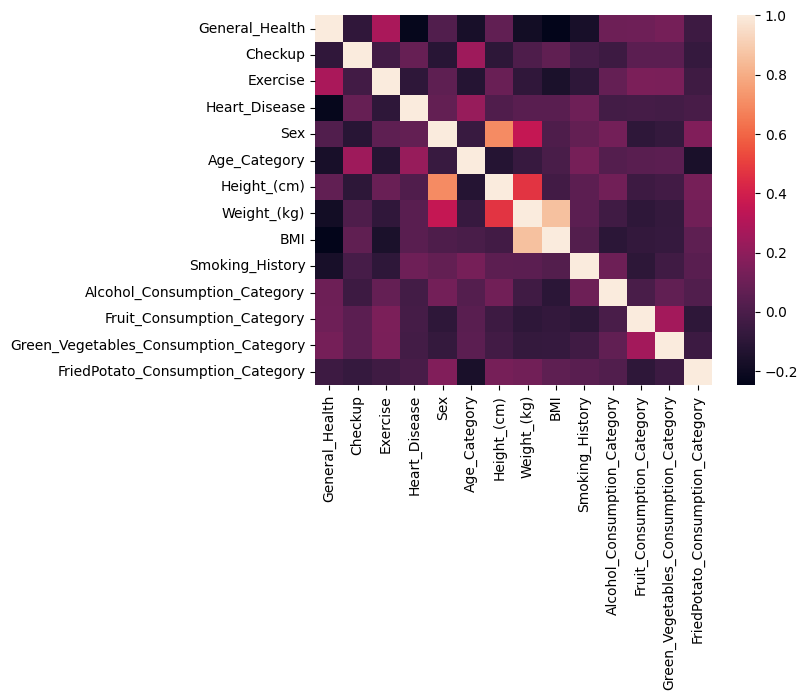

In [ ]:
sns.heatmap(train_df.corr())

In [ ]:
# Feature importance Dataframe 1
fi_df1 = train_df.corr()["Heart_Disease"].sort_values(ascending = False).reset_index().rename(columns = {"index": "feature", "Heart_Disease": "corr_coeff"}).drop(0)

In [ ]:
fi_df1

,feature,corr_coeff
1,Age_Category,0.225371
2,Smoking_History,0.106472
3,Checkup,0.084323
4,Sex,0.071322
5,Weight_(kg),0.044547
6,BMI,0.041666
7,Height_(cm),0.015186
8,FriedPotato_Consumption_Category,-0.009140
9,Fruit_Consumption_Category,-0.022154
10,Green_Vegetables_Consumption_Category,-0.025716


### Random Forest's Feature Importance

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight = "balanced")
rf.fit(X_label, y_label)

fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf.feature_importances_
}).sort_values(by = 'rf_importance', ascending = False)

fi_df2

,feature,rf_importance
4,Age_Category,0.211185
7,BMI,0.179288
6,Weight_(kg),0.153199
0,General_Health,0.119680
5,Height_(cm),0.101142
10,Fruit_Consumption_Category,0.051650
12,FriedPotato_Consumption_Category,0.034358
11,Green_Vegetables_Consumption_Category,0.034044
1,Checkup,0.028785
9,Alcohol_Consumption_Category,0.027315


### Random Forest's Feature Importance with `balanced_subsample`

In [ ]:
rf2 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight = "balanced_subsample")
rf2.fit(X_label, y_label)

fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'rf2_importance': rf2.feature_importances_
}).sort_values(by = 'rf2_importance', ascending = False)

fi_df3

,feature,rf2_importance
4,Age_Category,0.211161
7,BMI,0.179093
6,Weight_(kg),0.154034
0,General_Health,0.119211
5,Height_(cm),0.100981
10,Fruit_Consumption_Category,0.051539
11,Green_Vegetables_Consumption_Category,0.034023
12,FriedPotato_Consumption_Category,0.033694
1,Checkup,0.028899
9,Alcohol_Consumption_Category,0.026771


In [ ]:
sample_weights = compute_sample_weight(class_weight = "balanced", y = y_label)

In [ ]:
sample_weights

array([0.54236911, 6.40052564, 0.54236911, ..., 0.54236911, 0.54236911,
       0.54236911])

In [ ]:
gb = GradientBoostingClassifier(random_state = 42)
gb.fit(X_label, y_label, sample_weight = sample_weights)

fi_d4 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb.feature_importances_
}).sort_values(by = 'gb_importance', ascending = False)

fi_d4

,feature,gb_importance
4,Age_Category,0.570398
0,General_Health,0.312310
3,Sex,0.059588
8,Smoking_History,0.026715
1,Checkup,0.013090
7,BMI,0.007103
9,Alcohol_Consumption_Category,0.004450
6,Weight_(kg),0.001921
5,Height_(cm),0.001913
2,Exercise,0.001644


In [ ]:
X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size = 0.2, random_state = 42)

rf3 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight = "balanced")
rf3.fit(X_train_label, y_train_label)

perm_importance = permutation_importance(rf3, X_test_label, y_test_label, n_repeats = 30, random_state = 42)

fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'perm_importance': perm_importance.importances_mean
}).sort_values(by = 'perm_importance', ascending = False)

fi_df5

,feature,perm_importance
0,General_Health,0.000406
9,Alcohol_Consumption_Category,-0.000155
11,Green_Vegetables_Consumption_Category,-0.000345
12,FriedPotato_Consumption_Category,-0.000392
2,Exercise,-0.000555
10,Fruit_Consumption_Category,-0.000772
8,Smoking_History,-0.000794
1,Checkup,-0.000820
4,Age_Category,-0.001110
3,Sex,-0.002088


In [ ]:
scaler = StandardScaler()
X_label_scaled = scaler.fit_transform(X_label)

lasso = LogisticRegression(penalty = "l1", solver = "liblinear", random_state = 42, class_weight = "balanced")
lasso.fit(X_label_scaled, y_label)

fi_d6 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coef': lasso.coef_[0]
}).sort_values(by = 'lasso_coef', ascending = False)

fi_d6

,feature,lasso_coef
4,Age_Category,1.079404
3,Sex,0.416892
8,Smoking_History,0.225735
1,Checkup,0.193983
7,BMI,0.170506
11,Green_Vegetables_Consumption_Category,0.010282
10,Fruit_Consumption_Category,0.002069
5,Height_(cm),-0.004956
12,FriedPotato_Consumption_Category,-0.006825
2,Exercise,-0.035877


In [ ]:
estimator = RandomForestClassifier(class_weight = "balanced_subsample")

selector_label = RFE(estimator, n_features_to_select = X_label.shape[1], step = 1)
selector_label = selector_label.fit(X_label, y_label)

selected_features = X_label.columns[selector_label.support_]

selected_coefficients = selector_label.estimator_.feature_importances_

fi_df7 = pd.DataFrame({
    'feature': selected_features,
    'rfe_coef': selected_coefficients
}).sort_values(by = 'rfe_coef', ascending = False)

fi_df7

,feature,rfe_coef
4,Age_Category,0.208479
7,BMI,0.178849
6,Weight_(kg),0.152916
0,General_Health,0.120797
5,Height_(cm),0.101753
10,Fruit_Consumption_Category,0.051234
12,FriedPotato_Consumption_Category,0.033729
11,Green_Vegetables_Consumption_Category,0.033558
1,Checkup,0.029266
9,Alcohol_Consumption_Category,0.027691


In [ ]:
log_reg = LogisticRegression(random_state = 42, max_iter = 1000, class_weight = "balanced")
log_reg.fit(X_label, y_label)

fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'log_reg_coef': log_reg.coef_[0]
}).sort_values(by = 'log_reg_coef', ascending = False)

fi_df8

,feature,log_reg_coef
3,Sex,0.858684
8,Smoking_History,0.457087
4,Age_Category,0.305186
1,Checkup,0.231792
11,Green_Vegetables_Consumption_Category,0.016588
6,Weight_(kg),0.008870
10,Fruit_Consumption_Category,0.002775
12,FriedPotato_Consumption_Category,-0.011214
7,BMI,-0.013639
5,Height_(cm),-0.016090


In [ ]:
mi = mutual_info_classif(X_label, y_label)

fi_df9 = pd.DataFrame({
    'feature': X_label.columns,
    'mutual_info': mi
}).sort_values(by = 'mutual_info', ascending = False)

fi_df9

,feature,mutual_info
2,Exercise,0.062180
1,Checkup,0.050769
3,Sex,0.041299
0,General_Health,0.039825
4,Age_Category,0.034234
8,Smoking_History,0.032630
11,Green_Vegetables_Consumption_Category,0.022625
10,Fruit_Consumption_Category,0.020777
12,FriedPotato_Consumption_Category,0.006119
9,Alcohol_Consumption_Category,0.004796


In [ ]:
fi_df = fi_df1.merge(fi_df2, on = "feature").merge(fi_df3, on = "feature").merge(fi_d4, on = "feature").merge(fi_df5, on = "feature").merge(fi_d6, on = "feature").merge(fi_df7, on = "feature").merge(fi_df8, on = "feature").merge(fi_df9, on = "feature")

In [ ]:
fi_df.set_index("feature", inplace = True)

In [ ]:
fi_df = fi_df.divide(fi_df.sum(axis = 1), axis = 0)

In [ ]:
fi_df

,corr_coeff,rf_importance,rf2_importance,gb_importance,perm_importance,lasso_coef,rfe_coef,log_reg_coef,mutual_info
feature,,,,,,,,,
Age_Category,0.079236,0.074248,0.074240,0.200540,-0.000390,0.379496,0.073297,0.107297,0.012036
Smoking_History,0.116044,0.024974,0.025604,0.029116,-0.000865,0.246027,0.025360,0.498177,0.035563
Checkup,0.127745,0.043608,0.043780,0.019831,-0.001242,0.293875,0.044336,0.351154,0.076912
Sex,0.047414,0.012728,0.012947,0.039613,-0.001388,0.277144,0.013246,0.570841,0.027455
Weight_(kg),0.109451,0.376406,0.378459,0.004721,-0.018628,-0.257494,0.375710,0.021794,0.009581
BMI,0.056378,0.242589,0.242325,0.009611,-0.010168,0.230706,0.241995,-0.018454,0.005019
Height_(cm),0.050988,0.339593,0.339050,0.006422,-0.023069,-0.016642,0.341643,-0.054022,0.016037
FriedPotato_Consumption_Category,-0.113019,0.424843,0.416639,0.006720,-0.004849,-0.084397,0.417063,-0.138666,0.075665
Fruit_Consumption_Category,-0.140757,0.328159,0.327456,0.001745,-0.004907,0.013145,0.325519,0.017631,0.132009


In [ ]:
fi_df.median(axis = 1)

,0
feature,
Age_Category,0.074248
Smoking_History,0.029116
Checkup,0.044336
Sex,0.027455
Weight_(kg),0.021794
BMI,0.056378
Height_(cm),0.016037
FriedPotato_Consumption_Category,0.006720
Fruit_Consumption_Category,0.017631


In [ ]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42, class_weight = "balanced_subsample")

scores = cross_val_score(rf, X_label, y_label, cv = 5, scoring = "accuracy")

print(scores)

[0.91280898 0.91422659 0.91295563 0.91236903 0.91284015]


In [ ]:
train_df

,General_Health,Checkup,Exercise,Heart_Disease,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption_Category,Fruit_Consumption_Category,Green_Vegetables_Consumption_Category,FriedPotato_Consumption_Category
0,0.0,3.0,0,0,0,10.0,150.0,32.66,14.54,1,0.0,1.0,1.0,1.0
1,3.0,4.0,0,1,0,10.0,165.0,77.11,28.29,0,0.0,1.0,0.0,0.0
2,3.0,4.0,1,0,0,8.0,163.0,88.45,33.47,0,0.0,0.0,0.0,2.0
3,0.0,4.0,1,1,1,11.0,180.0,93.44,28.73,0,0.0,1.0,1.0,1.0
4,2.0,4.0,0,0,1,12.0,191.0,88.45,24.37,1,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,3.0,4.0,1,0,1,1.0,168.0,81.65,29.05,0,0.0,1.0,0.0,0.0
308850,1.0,2.0,1,0,1,9.0,180.0,69.85,21.48,0,1.0,0.0,2.0,0.0
308851,3.0,1.0,1,0,0,2.0,157.0,61.23,24.69,1,0.0,2.0,0.0,0.0
308852,3.0,4.0,1,0,1,9.0,183.0,79.38,23.73,0,0.0,1.0,1.0,0.0


In [ ]:
test_df[list(ordinal_dict.keys())] = o_encoder.fit_transform(test_df[list(ordinal_dict.keys())])

In [ ]:
for column in label_cols:
  test_df[column] = l_encoder.fit_transform(test_df[column])

In [ ]:
rf.fit(X_label.values, y_label.values)
y_pred = rf.predict(test_df.drop(columns = ["Heart_Disease"]).values)
print(classification_report(test_df["Heart_Disease"].values, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.98      0.68      1000
           1       0.79      0.08      0.14      1000

    accuracy                           0.53      2000
   macro avg       0.65      0.53      0.41      2000
weighted avg       0.65      0.53      0.41      2000



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
rf.fit(X_label.drop(columns = ["Height_(cm)", "Alcohol_Consumption_Category",	"Fruit_Consumption_Category",	"Green_Vegetables_Consumption_Category",	"FriedPotato_Consumption_Category"]).values, y_label.values)
y_pred = rf.predict(test_df.drop(columns = ["Heart_Disease", "Height_(cm)", "Alcohol_Consumption_Category",	"Fruit_Consumption_Category",	"Green_Vegetables_Consumption_Category",	"FriedPotato_Consumption_Category"]).values)
print(classification_report(test_df["Heart_Disease"].values, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.92      0.68      1000
           1       0.73      0.22      0.33      1000

    accuracy                           0.57      2000
   macro avg       0.64      0.57      0.51      2000
weighted avg       0.64      0.57      0.51      2000



In [ ]:
rf.fit(X_label.drop(columns = ["Weight_(kg)", "Height_(cm)", "Alcohol_Consumption_Category",	"Fruit_Consumption_Category",	"Green_Vegetables_Consumption_Category",	"FriedPotato_Consumption_Category"]).values, y_label.values)
y_pred = rf.predict(test_df.drop(columns = ["Heart_Disease", "Weight_(kg)", "Height_(cm)", "Alcohol_Consumption_Category",	"Fruit_Consumption_Category",	"Green_Vegetables_Consumption_Category",	"FriedPotato_Consumption_Category"]).values)
print(classification_report(test_df["Heart_Disease"].values, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.89      0.69      1000
           1       0.73      0.30      0.42      1000

    accuracy                           0.59      2000
   macro avg       0.64      0.59      0.56      2000
weighted avg       0.64      0.59      0.56      2000



In [ ]:
rf.fit(X_label.drop(columns = ["BMI", "Weight_(kg)", "Height_(cm)", "Alcohol_Consumption_Category",	"Fruit_Consumption_Category",	"Green_Vegetables_Consumption_Category",	"FriedPotato_Consumption_Category"]).values, y_label.values)
y_pred = rf.predict(test_df.drop(columns = ["BMI", "Heart_Disease", "Weight_(kg)", "Height_(cm)", "Alcohol_Consumption_Category",	"Fruit_Consumption_Category",	"Green_Vegetables_Consumption_Category",	"FriedPotato_Consumption_Category"]).values)
print(classification_report(test_df["Heart_Disease"].values, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74      1000
           1       0.73      0.80      0.76      1000

    accuracy                           0.75      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.75      0.75      0.75      2000



In [ ]:
rf.fit(X_label.drop(columns = ["BMI", "Height_(cm)", "Alcohol_Consumption_Category",	"Fruit_Consumption_Category",	"Green_Vegetables_Consumption_Category",	"FriedPotato_Consumption_Category"]).values, y_label.values)
y_pred = rf.predict(test_df.drop(columns = ["BMI", "Heart_Disease", "Height_(cm)", "Alcohol_Consumption_Category",	"Fruit_Consumption_Category",	"Green_Vegetables_Consumption_Category",	"FriedPotato_Consumption_Category"]).values)
print(classification_report(test_df["Heart_Disease"].values, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.81      0.71      1000
           1       0.73      0.51      0.60      1000

    accuracy                           0.66      2000
   macro avg       0.68      0.66      0.65      2000
weighted avg       0.68      0.66      0.65      2000



In [ ]:
rf.fit(X_label.drop(columns = ["BMI", "Alcohol_Consumption_Category",	"Fruit_Consumption_Category",	"Green_Vegetables_Consumption_Category",	"FriedPotato_Consumption_Category"]).values, y_label.values)
y_pred = rf.predict(test_df.drop(columns = ["BMI", "Heart_Disease", "Alcohol_Consumption_Category",	"Fruit_Consumption_Category",	"Green_Vegetables_Consumption_Category",	"FriedPotato_Consumption_Category"]).values)
print(classification_report(test_df["Heart_Disease"].values, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.91      0.69      1000
           1       0.74      0.25      0.38      1000

    accuracy                           0.58      2000
   macro avg       0.65      0.58      0.53      2000
weighted avg       0.65      0.58      0.53      2000



In [ ]:
rf.fit(X_label.drop(columns = ["Sex", "BMI", "Alcohol_Consumption_Category",	"Fruit_Consumption_Category",	"Green_Vegetables_Consumption_Category",	"FriedPotato_Consumption_Category"]).values, y_label.values)
y_pred = rf.predict(test_df.drop(columns = ["Sex", "BMI", "Heart_Disease", "Alcohol_Consumption_Category",	"Fruit_Consumption_Category",	"Green_Vegetables_Consumption_Category",	"FriedPotato_Consumption_Category"]).values)
print(classification_report(test_df["Heart_Disease"].values, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.90      0.68      1000
           1       0.73      0.27      0.39      1000

    accuracy                           0.58      2000
   macro avg       0.64      0.58      0.54      2000
weighted avg       0.64      0.58      0.54      2000



In [ ]:
rf.fit(X_label.drop(columns = ["Checkup", "BMI", "Alcohol_Consumption_Category",	"Fruit_Consumption_Category",	"Green_Vegetables_Consumption_Category",	"FriedPotato_Consumption_Category"]).values, y_label.values)
y_pred = rf.predict(test_df.drop(columns = ["Checkup", "BMI", "Heart_Disease", "Alcohol_Consumption_Category",	"Fruit_Consumption_Category",	"Green_Vegetables_Consumption_Category",	"FriedPotato_Consumption_Category"]).values)
print(classification_report(test_df["Heart_Disease"].values, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.90      0.69      1000
           1       0.74      0.27      0.39      1000

    accuracy                           0.59      2000
   macro avg       0.64      0.59      0.54      2000
weighted avg       0.64      0.59      0.54      2000



In [ ]:
rf.fit(X_label.drop(columns = ["Smoking_History", "BMI", "Alcohol_Consumption_Category",	"Fruit_Consumption_Category",	"Green_Vegetables_Consumption_Category",	"FriedPotato_Consumption_Category"]).values, y_label.values)
y_pred = rf.predict(test_df.drop(columns = ["Smoking_History", "BMI", "Heart_Disease", "Alcohol_Consumption_Category",	"Fruit_Consumption_Category",	"Green_Vegetables_Consumption_Category",	"FriedPotato_Consumption_Category"]).values)
print(classification_report(test_df["Heart_Disease"].values, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.89      0.69      1000
           1       0.74      0.31      0.44      1000

    accuracy                           0.60      2000
   macro avg       0.65      0.60      0.56      2000
weighted avg       0.65      0.60      0.56      2000



In [ ]:
rf.fit(X_label.drop(columns = ["Age_Category", "BMI", "Alcohol_Consumption_Category",	"Fruit_Consumption_Category",	"Green_Vegetables_Consumption_Category",	"FriedPotato_Consumption_Category"]).values, y_label.values)
y_pred = rf.predict(test_df.drop(columns = ["Age_Category", "BMI", "Heart_Disease", "Alcohol_Consumption_Category",	"Fruit_Consumption_Category",	"Green_Vegetables_Consumption_Category",	"FriedPotato_Consumption_Category"]).values)
print(classification_report(test_df["Heart_Disease"].values, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.83      0.68      1000
           1       0.70      0.39      0.50      1000

    accuracy                           0.61      2000
   macro avg       0.64      0.61      0.59      2000
weighted avg       0.64      0.61      0.59      2000



In [ ]:
rf.fit(X_label.drop(columns = ["Exercise", "BMI", "Alcohol_Consumption_Category",	"Fruit_Consumption_Category",	"Green_Vegetables_Consumption_Category",	"FriedPotato_Consumption_Category"]).values, y_label.values)
y_pred = rf.predict(test_df.drop(columns = ["Exercise", "BMI", "Heart_Disease", "Alcohol_Consumption_Category",	"Fruit_Consumption_Category",	"Green_Vegetables_Consumption_Category",	"FriedPotato_Consumption_Category"]).values)
print(classification_report(test_df["Heart_Disease"].values, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.88      0.69      1000
           1       0.73      0.31      0.43      1000

    accuracy                           0.60      2000
   macro avg       0.64      0.60      0.56      2000
weighted avg       0.64      0.60      0.56      2000



In [ ]:
rf.fit(X_label.drop(columns = ["General_Health", "BMI", "Alcohol_Consumption_Category",	"Fruit_Consumption_Category",	"Green_Vegetables_Consumption_Category",	"FriedPotato_Consumption_Category"]).values, y_label.values)
y_pred = rf.predict(test_df.drop(columns = ["General_Health", "BMI", "Heart_Disease", "Alcohol_Consumption_Category",	"Fruit_Consumption_Category",	"Green_Vegetables_Consumption_Category",	"FriedPotato_Consumption_Category"]).values)
print(classification_report(test_df["Heart_Disease"].values, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.84      0.68      1000
           1       0.70      0.38      0.49      1000

    accuracy                           0.61      2000
   macro avg       0.63      0.61      0.58      2000
weighted avg       0.63      0.61      0.58      2000



### Final Conclusion:


*   We will use the following features after conducting feature selection: `Age_Category`, `Checkup`, `Smoking_History`, `Sex`, `General_Health`, and `Exercise`.